<a href="https://colab.research.google.com/github/mdfardinxyz/Stellar-Evolution-H-R-Diagram-/blob/main/Stellar_Evolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# http://spiff.rit.edu/classes/phys370/lectures/statstar/statstar.html
#https://leo.phys.unm.edu/~gbtaylor/astr421/statstar.py  (PYTHON CODE)
%cd /content/drive/MyDrive/

#Download the whole "Statstar" folder and upload in your drive and link it with your colab.
#Sir just gave us the viewer permission of that drive folder. without editor access code won't run.
#So download and upload into your drive instead

import statstar as star


/content/drive/MyDrive
 Enter the mass of the star (in solar units):1
 Enter the luminosity of the star (in solar units):0.860710
 Enter the effective temperature of the star (in K):5500.2
 Enter the mass fraction of hydrogen (X):0.7
 Enter the mass fraction of metals (Z):0.008
CONGRATULATIONS, I THINK YOU FOUND IT!
However, be sure to look at your model carefully.
***** The integration has been completed *****
      The model has been stored in starmodl_py.dat


In [ ]:
import numpy as np

M = np.linspace(0.1, 100., 1000)


In [ ]:
beta = 4.

M = 1.

L, T = 0.860710, 5500.2

# L = Lsun * M**((2.*beta+8.)/(beta+1.))
# T = Tsun * M**(3./(beta+1.))

print(M,L,T)

X = 0.70
Z = 0.008

Igoof, ierr, istop = star.StatStar(M,L,T,X,Z)


1.0 0.86071 5500.2
CONGRATULATIONS, I THINK YOU FOUND IT!
However, be sure to look at your model carefully.
***** The integration has been completed *****
      The model has been stored in starmodl_py.dat


In [ ]:
f = open('starmodl_py.dat')
l = f.readlines()

l
#all units are in SI

['A Homogeneous Main-Sequence Model\n',
 ' The surface conditions are:        The central conditions are:\n',
 ' Mtot =  1.000000E+00 Msun          Mc/Mtot     =  4.00418E-04\n',
 ' Rtot =  1.020998E+00 Rsun          Rc/Rtot     =  1.90000E-02\n',
 ' Ltot =  8.607100E-01 Lsun          Lc/Ltot     =  7.67225E-02\n',
 ' Teff =  5.500200E+03 K             Density     =  7.72529E+01\n',
 ' X    =  7.000000E-01               Temperature =  1.41421E+07\n',
 ' Y    =  2.920000E-01               Pressure    =  1.46284E+17 dynes/cm**2\n',
 ' Z    =  8.000000E-03               epsilon     =  3.17232E+02 ergs/s/g\n',
 '                                    dlnP/dlnT   =  2.49808E+00\n',
 'Notes:\n',
 ' (1) Mass is listed as Qm = 1.0 - M_r/Mtot, where Mtot =     1.989e+33\n',
 ' (2) Convective zones are indicated by c, radiative zones by r\n',
 ' (3) dlnP/dlnT may be limited to +99.9 or -99.9# if so it is\n',
 ' labeled by *\n',
 '   r        Qm       L_r       T        P        rho      kap      ep

In [ ]:
d = np.array([i.strip().split() for i in l[16:]])

cols = l[15]

df = d[:,:7].astype('float')


In [ ]:
num_rows = df.shape[0]
print("Number of rows:", num_rows)

Number of rows: 424


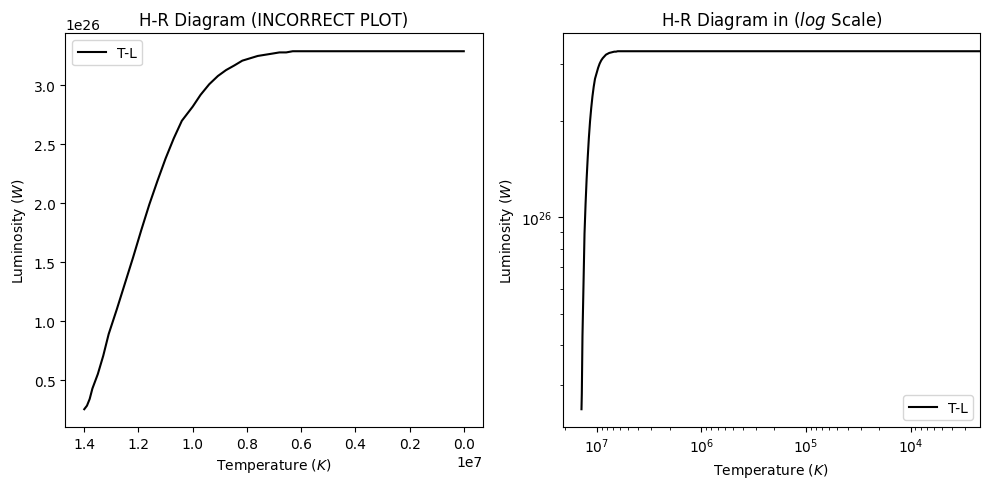

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Plot the first plot
plt.subplot(1, 2, 1)
plt.plot(df[:,3], df[:,2]*1e-7, label='T-L', color='black')
plt.xlabel('Temperature ($K$)')
plt.ylabel('Luminosity ($W$)')
plt.title('H-R Diagram (INCORRECT PLOT)')
plt.legend()

plt.gca().invert_xaxis()

# Plot the second plot
plt.subplot(1, 2, 2)
plt.loglog(df[:,3], df[:,2]*1e-7, label='T-L', color='black')
plt.xlabel('Temperature ($K$)')
plt.ylabel('Luminosity ($W$)')
plt.title('H-R Diagram in ($log$ Scale)')
plt.legend()

plt.gca().invert_xaxis()

plt.tight_layout()
plt.show()

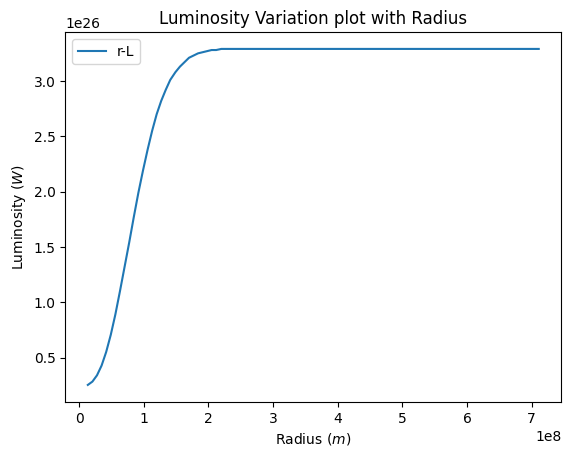

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df[:,0]*1e-2, df[:,2]*1e-7, label='r-L')
plt.xlabel('Radius ($m$)')
plt.ylabel('Luminosity ($W$)')
plt.title('Luminosity Variation plot with Radius')
plt.legend()

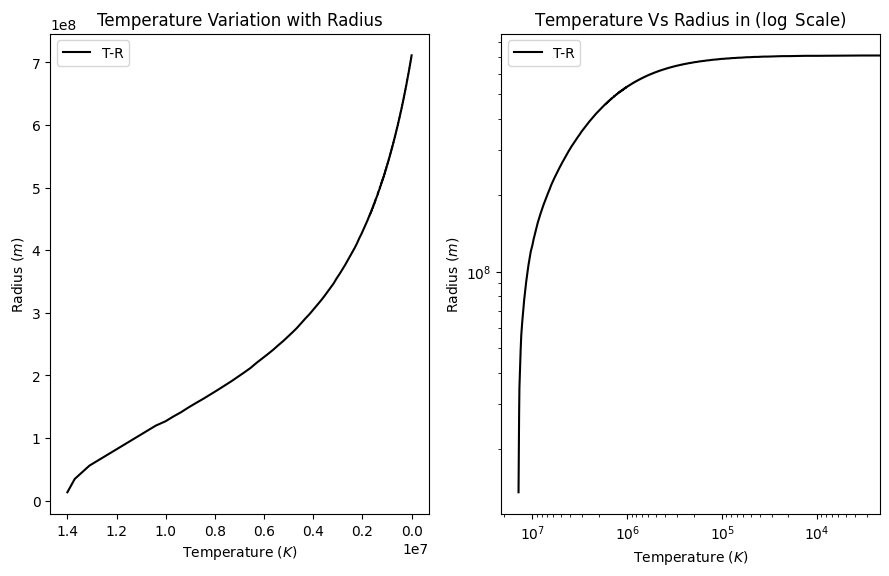

In [ ]:
import matplotlib.pyplot as plt

# Create a new figure
plt.figure(figsize=(9, 6))

# Plot the first plot
plt.subplot(1, 2, 1)
plt.plot(df[:,3], df[:,0]*1e-2, label='T-R', color='black')
plt.xlabel('Temperature ($K$)')
plt.ylabel('Radius ($m$)')
plt.title('Temperature Variation with Radius')
plt.legend()
plt.gca().invert_xaxis()

# Plot the second plot
plt.subplot(1, 2, 2)
plt.loglog(df[:,3], df[:,0]*1e-2, label='T-R', color='black')
plt.xlabel('Temperature ($K$)')
plt.ylabel('Radius ($m$)')
plt.title('Temperature Vs Radius in ($\log$ Scale) ')
plt.legend()
plt.gca().invert_xaxis()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


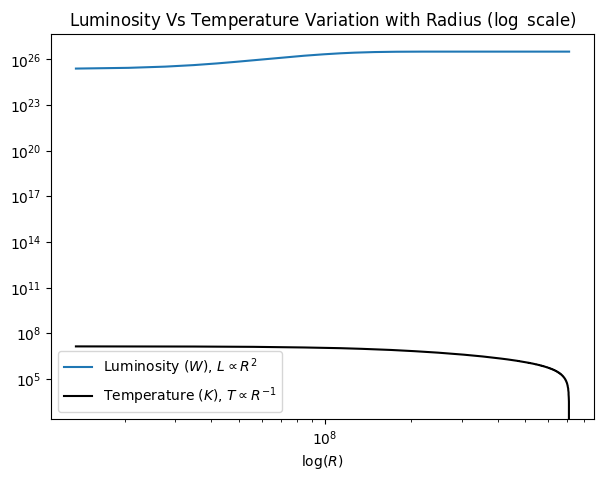

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.loglog(df[:,0]*1e-2, df[:,2]*1e-7, label='Luminosity ($W$), $L \propto R^2$')
plt.loglog(df[:,0]*1e-2, df[:,3], label='Temperature ($K$), $T \propto R^{-1}$', color='black')

plt.xlabel('$\log(R)$')
plt.title('Luminosity Vs Temperature Variation with Radius ($\log$ scale)')
plt.legend()


plt.show()


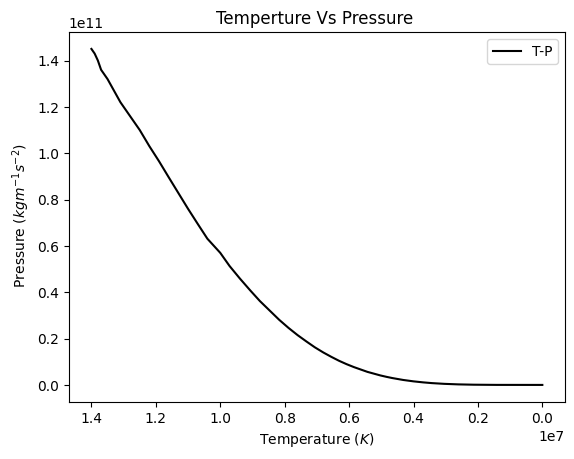

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df[:,3], df[:,4]*1e-6, label='T-P', color='black')
plt.xlabel('Temperature ($K$)')
plt.ylabel(' Pressure ($kg m^{−1} s^{−2}$)')
plt.title('Temperture Vs Pressure ')
plt.legend()

plt.gca().invert_xaxis()

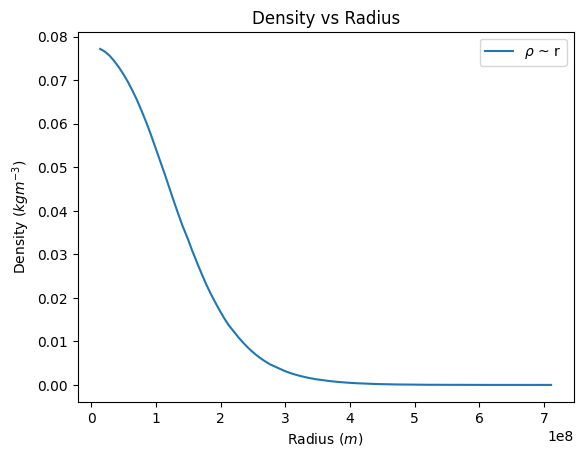

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df[:,0]*1e-2, df[:,5]*1e-3, label=r'$\rho$ ~ r')
plt.xlabel('Radius ($m$)')
plt.ylabel('Density ($kg m^{-3}$)')
plt.title('Density vs Radius')
plt.legend()
plt.show()


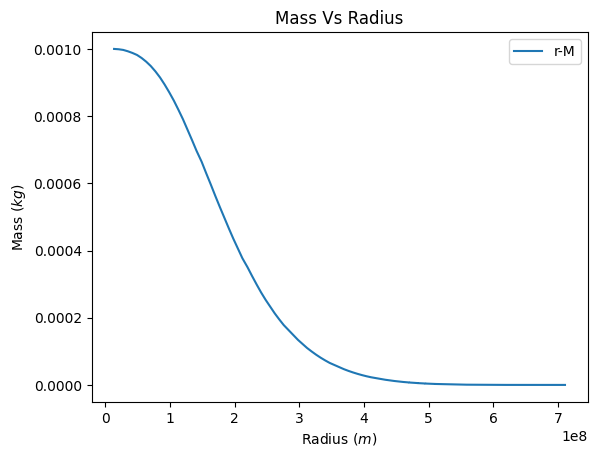

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df[:,0]*1e-2, df[:,1]*1e-3, label='r-M')
plt.xlabel('Radius ($m$)')
plt.ylabel('Mass ($kg$)')
plt.title('Mass Vs Radius')
plt.legend()

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df[:,0]*1e-2, df[:,4]*1e-6, label='R-P')
plt.xlabel('Radius ($m$)')
plt.ylabel(' Pressure ($kg m^{−1} s^{−2}$)')
plt.title('Radius vs Pressure')
plt.legend()


NameError: name 'df' is not defined

Text(0.5, 1.0, 'Opacity Variation with Radius')

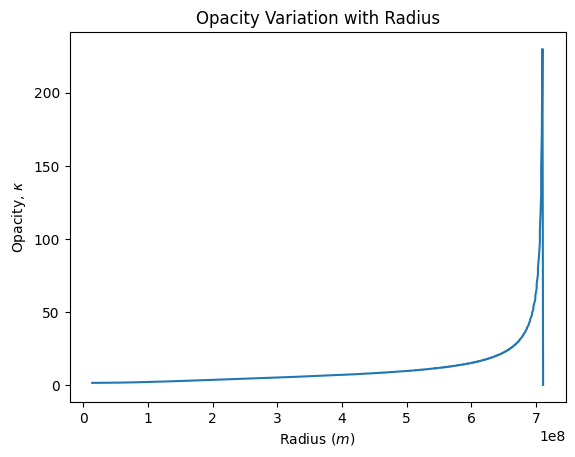

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df[:,0]*1e-2, df[:,6], label='R-$\kappa$')
plt.xlabel('Radius ($m$)')
plt.ylabel('Opacity, $\kappa$')
plt.title('Opacity Variation with Radius')

<ipython-input-182-7994d85c1082>:4: RuntimeWarning: divide by zero encountered in divide
  emissivity = (df[:,2]) / (4 * np.pi * (df[:,0])**2 * sigma * (df[:,3])**4)


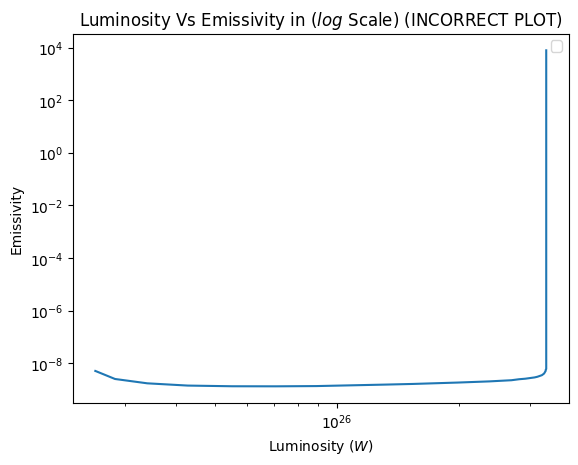

In [ ]:
import matplotlib.pyplot as plt
sigma = 5.67e-8

emissivity = (df[:,2]) / (4 * np.pi * (df[:,0])**2 * sigma * (df[:,3])**4)

plt.loglog(df[:,2]*1e-7, emissivity)

plt.xlabel('Luminosity ($W$)')
plt.ylabel('Emissivity')
plt.title('Luminosity Vs Emissivity in ($log$ Scale) (INCORRECT PLOT)')
plt.legend()


Text(0.5, 1.0, 'Opacity Variation with Raidus (INCORRECT PLOT)')

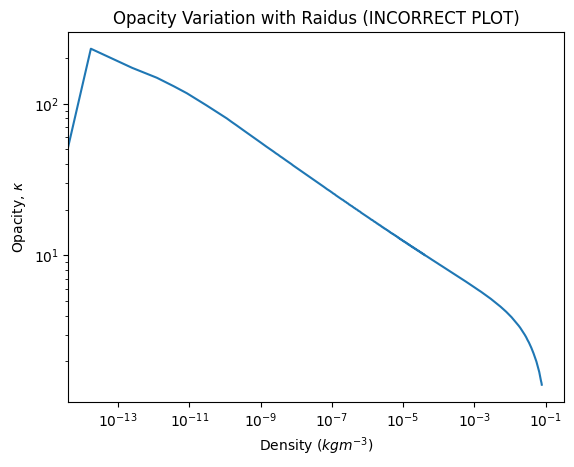

In [ ]:
import matplotlib.pyplot as plt

plt.loglog(df[:,5]*1e-3, df[:,6], label='')
plt.xlabel('Density ($kg m^{-3}$)')
plt.ylabel('Opacity, $\kappa$')
plt.title('Opacity Variation with Raidus (INCORRECT PLOT)')

# **Test Run**

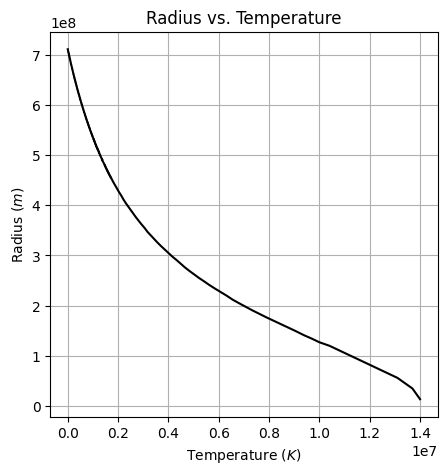

In [ ]:
import matplotlib.pyplot as plt

# Create a new figure
plt.figure(figsize=(5, 5))

# Plot the first plot
#plt.subplot(1, 2, 1)
plt.plot(df[:,3], df[:,0]*1e-2, label='T-R', color='black')
plt.xlabel('Temperature ($K$)')
plt.ylabel('Radius ($m$)')
plt.title('Radius vs. Temperature')
plt.grid(True)
#plt.gca().invert_xaxis()



# Adjust layout and display the plot
#plt.tight_layout()
plt.show()
